In [26]:
import sys
import time
import numpy as np
sys.path.append('../../lib/')
import matplotlib.pyplot as plt
from frustration_graph import *

In [27]:
from dwave.system import DWaveSampler, EmbeddingComposite
import dimod
import dwave.inspector

In [68]:
width = 5.949973986 # in inches
ratio = (np.sqrt(5.0) - 1.0) / 2.0

In [28]:
res_path = "../../Results/Ising_Frustrated/"

L = 20
config = np.zeros((L, L))

ratios = np.linspace(0, 1, 50)
strenghts = [1, 10, 20, 1000]
annealing_t = np.linspace(1, 1001, 4)

qpu = DWaveSampler() #'defaults'
sampler = EmbeddingComposite(qpu)

In [54]:
CS = np.zeros((len(strenghts), len(ratios)))

for i, C in enumerate(strenghts):
    for j, ratio in enumerate(ratios):
        bqm = bqm_frustration(L, ratio, 0)
        sampleset = sampler.sample(bqm, num_reads=50, chain_strength=C,
                                        label=f'Ising Frustrated {i+1}/{ratios.size}')
        
        
        for node, value in sampleset.first.sample.items():
            split = node.split('-')
            x, y = int(split[0]), int(split[1])
            
            config[x, y] = value
        
        CS[i, j] = np.abs(np.mean(config))
        time.sleep(2)

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [63]:
C = strenghts[-1]
for j, ratio in enumerate(ratios):
    bqm = bqm_frustration(L, ratio, 0)
    sampleset = sampler.sample(bqm, num_reads=50, chain_strength=C,
                                    label=f'Ising Frustrated {j+1}/{ratios.size}')
    
    
    for node, value in sampleset.first.sample.items():
        split = node.split('-')
        x, y = int(split[0]), int(split[1])
        
        config[x, y] = value
    
    CS[-1, j] = np.abs(np.mean(config))
    time.sleep(2)

In [64]:
np.save(res_path + "DWave/Chain_Strenghts", CS) 

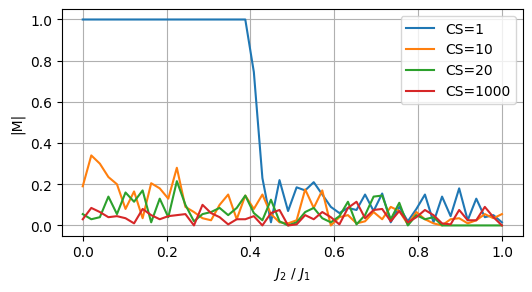

In [76]:
fig = plt.figure(figsize=(width, 0.8* width * ratio))

for i, cs in enumerate(strenghts):
    plt.plot(ratios, np.abs(CS[i, :]), label=f"CS={cs}")

plt.xlabel(r"$J_2$ / $J_1$")
plt.ylabel("|M|")
plt.grid()
plt.legend()
plt.savefig("../../Images/Ising_Frustrated/Chain_strenght_plots.pdf")

In [32]:
ATs = np.zeros((len(strenghts), len(ratios)))

for i, At in enumerate(annealing_t):
    for j, ratio in enumerate(ratios):
        bqm = bqm_frustration(L, ratio, 0)
        sampleset = sampler.sample(bqm, num_reads=50, annealing_time=At,
                                        label=f'Ising Frustrated {i+1}/{ratios.size}')
        
        
        for node, value in sampleset.first.sample.items():
            split = node.split('-')
            x, y = int(split[0]), int(split[1])
            
            config[x, y] = value
        
        ATs[i, j] = np.mean(config)
        time.sleep(4)

In [52]:
np.save(res_path + "DWave/Annealing_Times", ATs) 

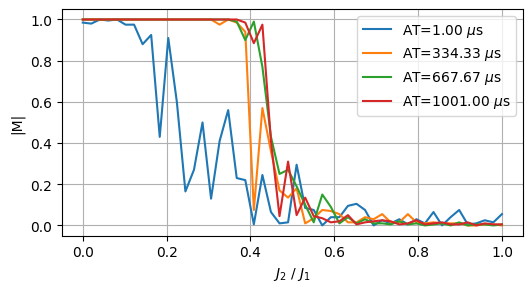

In [75]:
fig = plt.figure(figsize=(width, 0.8* width * ratio))

for i, at in enumerate(annealing_t):
    plt.plot(ratios, np.abs(ATs[i, :]), label=fr"AT={at:.2f} $\mu$s")

plt.xlabel(r"$J_2$ / $J_1$")
plt.ylabel("|M|")
plt.grid()
plt.legend()
plt.savefig("../../Images/Ising_Frustrated/Annealing_time_plots.pdf")